In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# mpl.rcParams['font.size']=20
import numpy as np
import os

from matplotlib.ticker import PercentFormatter

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

In [2]:
df = ['/Users/SaSa 01/Desktop/aqimlm/data/mcmillan_data/summer mcmill data\\mcmillan_data_summer.csv']
summer = pd.read_csv(df[0])
summer

,Unnamed: 0,AQI Value,PBLH (m),CO (ppm),O3 (ppm),PM 2.5 (ug/m3),PM 10 (ug/m3),SO2 (ppb),NO2 (ppb),Temperture (C),Dew Point Temp (C),Relative Humidity (%)
0,2011-05-01,-1.0,873.62213,8.0,31.0,36.0,0.0,0.0,27.0,13.516667,8.733333,73.167500
1,2011-05-02,-1.0,1448.49010,9.0,43.0,49.0,0.0,0.0,34.0,17.161538,12.380769,73.965769
2,2011-05-03,0.0,1816.53630,9.0,43.0,56.0,26.0,0.0,20.0,21.708333,15.937500,71.032917
3,2011-05-04,-1.0,1910.51560,7.0,37.0,20.0,0.0,0.0,16.0,12.948718,8.241026,75.038462
4,2011-05-05,-1.0,2778.12160,8.0,48.0,27.0,0.0,0.0,46.0,12.920000,1.396000,48.873200
...,...,...,...,...,...,...,...,...,...,...,...,...
1379,2022-05-27,-1.0,751.17566,5.0,31.0,22.0,0.0,1.2,18.0,2.747576,2.348667,10.502091
1380,2022-05-28,-1.0,751.17566,5.0,37.0,36.0,0.0,0.0,13.0,2.026258,1.464088,6.700566
1381,2022-05-29,0.0,751.17566,7.0,51.0,49.0,0.0,0.0,25.0,1.779006,1.075769,4.454968
1382,2022-05-30,0.0,751.17566,7.0,54.0,58.0,0.0,0.0,17.0,1.913269,1.356506,5.030513


In [3]:
summer.columns

Index(['Unnamed: 0', ' AQI Value', 'PBLH (m)', 'CO (ppm)', 'O3 (ppm)',
       'PM 2.5 (ug/m3)', 'PM 10 (ug/m3)', 'SO2 (ppb)', 'NO2 (ppb)',
       'Temperture (C)', 'Dew Point Temp (C)', 'Relative Humidity (%)'],
      dtype='object')

In [4]:
datetime = pd.to_datetime(summer['Unnamed: 0'])
summer['Date'] = datetime
summer

,Unnamed: 0,AQI Value,PBLH (m),CO (ppm),O3 (ppm),PM 2.5 (ug/m3),PM 10 (ug/m3),SO2 (ppb),NO2 (ppb),Temperture (C),Dew Point Temp (C),Relative Humidity (%),Date
0,2011-05-01,-1.0,873.62213,8.0,31.0,36.0,0.0,0.0,27.0,13.516667,8.733333,73.167500,2011-05-01
1,2011-05-02,-1.0,1448.49010,9.0,43.0,49.0,0.0,0.0,34.0,17.161538,12.380769,73.965769,2011-05-02
2,2011-05-03,0.0,1816.53630,9.0,43.0,56.0,26.0,0.0,20.0,21.708333,15.937500,71.032917,2011-05-03
3,2011-05-04,-1.0,1910.51560,7.0,37.0,20.0,0.0,0.0,16.0,12.948718,8.241026,75.038462,2011-05-04
4,2011-05-05,-1.0,2778.12160,8.0,48.0,27.0,0.0,0.0,46.0,12.920000,1.396000,48.873200,2011-05-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1379,2022-05-27,-1.0,751.17566,5.0,31.0,22.0,0.0,1.2,18.0,2.747576,2.348667,10.502091,2022-05-27
1380,2022-05-28,-1.0,751.17566,5.0,37.0,36.0,0.0,0.0,13.0,2.026258,1.464088,6.700566,2022-05-28
1381,2022-05-29,0.0,751.17566,7.0,51.0,49.0,0.0,0.0,25.0,1.779006,1.075769,4.454968,2022-05-29
1382,2022-05-30,0.0,751.17566,7.0,54.0,58.0,0.0,0.0,17.0,1.913269,1.356506,5.030513,2022-05-30


In [5]:
mms = summer.groupby(by=summer['Date'].dt.date).mean()
mms

,AQI Value,PBLH (m),CO (ppm),O3 (ppm),PM 2.5 (ug/m3),PM 10 (ug/m3),SO2 (ppb),NO2 (ppb),Temperture (C),Dew Point Temp (C),Relative Humidity (%)
Date,,,,,,,,,,,
2011-05-01,-1.0,873.62213,8.0,31.0,36.0,0.0,0.0,27.0,13.516667,8.733333,73.167500
2011-05-02,-1.0,1448.49010,9.0,43.0,49.0,0.0,0.0,34.0,17.161538,12.380769,73.965769
2011-05-03,0.0,1816.53630,9.0,43.0,56.0,26.0,0.0,20.0,21.708333,15.937500,71.032917
2011-05-04,-1.0,1910.51560,7.0,37.0,20.0,0.0,0.0,16.0,12.948718,8.241026,75.038462
2011-05-05,-1.0,2778.12160,8.0,48.0,27.0,0.0,0.0,46.0,12.920000,1.396000,48.873200
...,...,...,...,...,...,...,...,...,...,...,...
2022-05-27,-1.0,751.17566,5.0,31.0,22.0,0.0,1.2,18.0,2.747576,2.348667,10.502091
2022-05-28,-1.0,751.17566,5.0,37.0,36.0,0.0,0.0,13.0,2.026258,1.464088,6.700566
2022-05-29,0.0,751.17566,7.0,51.0,49.0,0.0,0.0,25.0,1.779006,1.075769,4.454968


In [6]:
mms.isnull().values.any()

True

In [7]:
mms.isnull().sum().sum()

4

In [8]:
mms = mms.fillna(0) 

In [9]:
mms.isnull().values.any()

False

# Splitting the Dataset

In [10]:
# mms.drop(' AQI Value', axis=1)

In [11]:
x = mms.drop(' AQI Value', axis=1)
y = mms[' AQI Value']

In [12]:
x_main,x_test,y_main,y_test = train_test_split(x,y,test_size=0.1,stratify=y)
x_train,x_val,y_train,y_val= train_test_split(x_main,y_main,test_size=0.2,stratify=y_main)

testing = 30%, validation = 20%, training = 50%; stratified to y so that the distribution of aqi (+1 = 44%, 0 = 50%, -1 = 6%) is held constant throughout the splitting 

In [13]:
print(f'Training sample: [{x_train.shape}, {y_train.shape}], ({type(x_train)}, {type(x_train)})')
print(f'Test sample: [{x_test.shape}, {y_test.shape}], ({type(x_test)}, {type(x_test)})')
print(f'Validation sample: [{x_val.shape}, {y_val.shape}], ({type(x_val)}, {type(x_val)})')

Training sample: [(996, 10), (996,)], (<class 'pandas.core.frame.DataFrame'>, <class 'pandas.core.frame.DataFrame'>)
Test sample: [(139, 10), (139,)], (<class 'pandas.core.frame.DataFrame'>, <class 'pandas.core.frame.DataFrame'>)
Validation sample: [(249, 10), (249,)], (<class 'pandas.core.frame.DataFrame'>, <class 'pandas.core.frame.DataFrame'>)


# Model Wrangle

## Support Vector Machine Classifier (SVM)

In [14]:
from sklearn.decomposition import PCA

svm_m = modeling_pipeline = Pipeline([('scaling', StandardScaler()), 
                                      ('pca', PCA()),
                                      ('model', SVC()), 
                                      ])

param_grid = [{'model__C': [1, 10, 100, 1000], 
               'pca__n_components': [None,1,5,10], 
               'model__kernel': ['rbf'], 
               'model__probability':[True]
              }]

scoring = ['f1_macro', 'roc_auc_ovo']

svm_results = GridSearchCV(estimator=svm_m, param_grid=param_grid, scoring=scoring, refit='roc_auc_ovo', cv=5, n_jobs=-1, error_score='raise')
svm_results = svm_results.fit(x_train, y_train)

In [15]:
print(f'Support Vector Machine Score: {svm_results.best_score_:.2%}')
print(svm_results.best_estimator_, svm_results.best_params_)
svm = svm_results.best_estimator_

Support Vector Machine Score: 95.65%
Pipeline(steps=[('scaling', StandardScaler()), ('pca', PCA()),
                ('model', SVC(C=10, probability=True))]) {'model__C': 10, 'model__kernel': 'rbf', 'model__probability': True, 'pca__n_components': None}


In [16]:
from sklearn.metrics import classification_report
y_pred = svm.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        -1.0       0.82      0.89      0.85        61
         0.0       0.86      0.83      0.84        69
         1.0       1.00      0.78      0.88         9

    accuracy                           0.85       139
   macro avg       0.89      0.83      0.86       139
weighted avg       0.85      0.85      0.85       139



## K-Nearest Neighbors (KNN)

In [17]:
knn_m = modeling_pipeline = Pipeline([('scaling', StandardScaler()),
                                      ('pca', PCA(n_components=None)),
                                      ('model', KNeighborsClassifier())])


param_grid = [
  {'model__n_neighbors': [1, 4, 8, 10, 15], 
   'pca__n_components': [None,1,2,3,4,5,10],
   'model__weights': ['uniform','distance']}
 ]

knn_results = GridSearchCV(estimator=knn_m, param_grid=param_grid, scoring=scoring, refit='roc_auc_ovo', cv=5, n_jobs=-1)
knn_results = knn_results.fit(x_train, y_train)

In [18]:
knn_score = knn_results.score(x_test, y_test)
print(f'k-Nearest Neighbor Score: {knn_score:.2%}')
print(knn_results.best_estimator_)

k-Nearest Neighbor Score: 93.79%
Pipeline(steps=[('scaling', StandardScaler()), ('pca', PCA()),
                ('model',
                 KNeighborsClassifier(n_neighbors=10, weights='distance'))])


In [19]:
y_pred = knn_results.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        -1.0       0.78      0.92      0.84        61
         0.0       0.84      0.77      0.80        69
         1.0       1.00      0.44      0.62         9

    accuracy                           0.81       139
   macro avg       0.87      0.71      0.75       139
weighted avg       0.82      0.81      0.81       139



## Random Forest Classifier (RF)

In [20]:
rf_pipeline = Pipeline([('scaling', StandardScaler()),
                        ('pca', PCA(n_components=None)),
                        ('rf', RandomForestClassifier())
                       ])

param_grid = [{'rf__max_depth': [10, 15, 20],
               'rf__n_estimators': [25, 50, 100],
               'rf__class_weight': [None, 'balanced', 'balanced_subsample'],
               'pca__n_components': [None, 1, 5, 10]
              }]

rf_results = GridSearchCV(estimator=rf_pipeline, param_grid=param_grid, scoring=scoring, refit='roc_auc_ovo', cv=5, n_jobs=-1)
rf_results = rf_results.fit(x_train, y_train)
rf_yhat = rf_results.predict(x_test)

rf_results.best_estimator_

Pipeline(steps=[('scaling', StandardScaler()), ('pca', PCA(n_components=10)),
                ('rf',
                 RandomForestClassifier(class_weight='balanced_subsample',
                                        max_depth=20))])

In [21]:
y_testp = rf_results.predict(x_test)
y_testp_rf = rf_results.predict_proba(x_test)


print(f'Validation score: {rf_results.best_score_:.2%}')
print(f'Test score: {rf_results.score(x_test, y_test):.2%}')


from sklearn.metrics import classification_report
print(classification_report(y_test, y_testp))

Validation score: 93.78%
Test score: 94.08%
              precision    recall  f1-score   support

        -1.0       0.83      0.87      0.85        61
         0.0       0.83      0.84      0.83        69
         1.0       1.00      0.56      0.71         9

    accuracy                           0.83       139
   macro avg       0.89      0.75      0.80       139
weighted avg       0.84      0.83      0.83       139



all did relatively well; all have accuracy above 80%; svm best with score 96.11%

## Voting Classifier Ensemble

In [22]:
ems = [('knn', knn_results.best_estimator_),('rf', rf_results.best_estimator_),('svm', svm_results.best_estimator_)]
en = VotingClassifier(estimators=ems, weights=None, voting='soft', n_jobs=-1)
en = en.fit(x_train, y_train)
scores = cross_val_score(estimator=en, X=x_train, y=y_train, cv=10, scoring='roc_auc_ovo')
print(f'ROC AUC OVO {scores.mean():.2f} (+/- {scores.std():.2f}) [Ensemble]')

ROC AUC OVO 0.95 (+/- 0.02) [Ensemble]


In [23]:
y_testp = en.predict(x_test)
y_testp_en = en.predict_proba(x_test)

print(f'Test score: {en.score(x_test, y_test):.2%}')

from sklearn.metrics import classification_report
print(classification_report(y_test, y_testp))

Test score: 87.05%
              precision    recall  f1-score   support

        -1.0       0.85      0.90      0.87        61
         0.0       0.88      0.86      0.87        69
         1.0       1.00      0.78      0.88         9

    accuracy                           0.87       139
   macro avg       0.91      0.84      0.87       139
weighted avg       0.87      0.87      0.87       139



In [24]:
ytestp = en.predict(x_val)
ytestp_en = en.predict_proba(x_val)

print(f'Test score: {en.score(x_val, y_val):.2%}')

from sklearn.metrics import classification_report
print(classification_report(y_val, ytestp))

Test score: 85.14%
              precision    recall  f1-score   support

        -1.0       0.86      0.85      0.85       110
         0.0       0.84      0.87      0.85       124
         1.0       0.92      0.73      0.81        15

    accuracy                           0.85       249
   macro avg       0.87      0.82      0.84       249
weighted avg       0.85      0.85      0.85       249



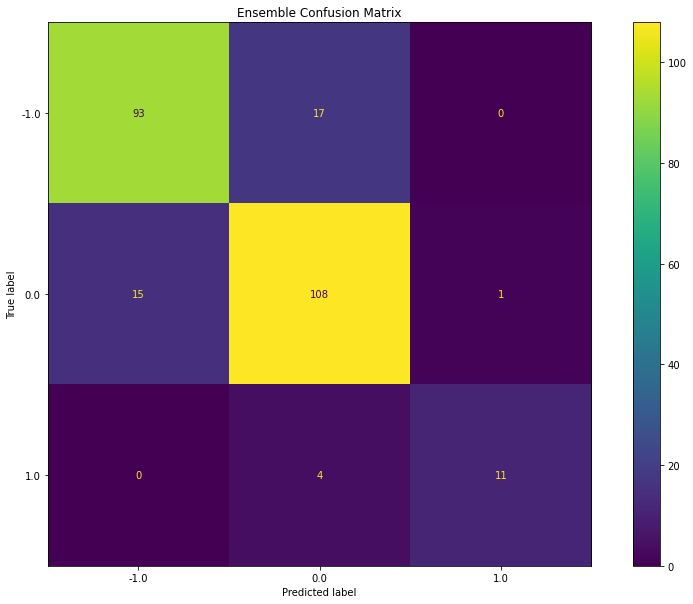

<Figure size 432x288 with 0 Axes>

In [25]:
cf_matrix = confusion_matrix(y_val, ytestp)

fig, ax = plt.subplots(figsize=(15,10))
# ax.subtitle("Best Estimator Confusion Matrix")
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix, 
                              display_labels=svm_results.best_estimator_.named_steps['model'].classes_)
disp.plot(ax=ax)
ax.set_title("Ensemble Confusion Matrix")
figcm = plt.gcf()
plt.show()
plt.draw()
figcm.savefig('mmcm.png',bbox_inches='tight',dpi=200)

In [26]:
# x_val.isnull().values.all()

In [27]:
x.isnull().values.all()

False

In [28]:
# from itertools import product

# import matplotlib.pyplot as plt

# from sklearn.inspection import DecisionBoundaryDisplay


# # Training classifiers
# clf1 = RandomForestClassifier(max_depth=20)
# clf2 = KNeighborsClassifier(n_neighbors=8)
# clf3 = SVC(gamma=0.1, kernel="rbf", probability=True)
# eclf = VotingClassifier(
#     estimators=[("rf", clf1), ("knn", clf2), ("svc", clf3)],
#     voting="soft",
#     weights=[2, 1, 2],
# )

# clf1.fit(x_test, y_test)
# clf2.fit(x_test, y_test)
# clf3.fit(x_test, y_test)
# eclf.fit(x_test, y_test)

# # Plotting decision regions
# f, axarr = plt.subplots(2, 2, sharex="col", sharey="row", figsize=(10, 8))
# for idx, clf, tt in zip(
#     product([0, 1], [0, 1]),
#     [clf1, clf2, clf3, eclf],
#     ["Random Forest (depth=20)", "KNN (k=8)", "Kernel SVM", "Soft Voting"],
# ):
#     DecisionBoundaryDisplay.from_estimator(
#         clf, x_test, alpha=0.4, ax=axarr[idx[0], idx[1]], response_method="predict"
#     )
#     axarr[idx[0], idx[1]].scatter(x[:, 0], x[:, 1], c=y, s=20, edgecolor="k")
#     axarr[idx[0], idx[1]].set_title(tt)

# plt.show()

# Application to Unseen Data

above dataset is stopped at the end of may 2022, but I have data till july 21. this will be used as the unseen data to test the model.

In [29]:
df1 = ['/Users/SaSa 01/Desktop/mcmillan_data\\mcmillan_data - unseen data (1).csv']
unseen_data = pd.read_csv(df1[0])
unseen_data

,Date,PBLH (m),CO (ppm),O3 (ppm),PM 2.5 (ug/m3),PM 10 (ug/m3),SO2 (ppb),NO2 (ppb),Temperture (C),Dew Point Temp (C),Relative Humidity (%)
0,06/01/2022,1954.86550,7,51,57,0,1.9,38,18.9,21.0,82.98
1,06/02/2022,1756.01120,3,50,30,0,0.7,56,16.7,21.0,82.98
2,06/03/2022,1904.46800,5,47,47,0,3.6,45,16.7,21.1,83.09
3,06/04/2022,1959.61730,5,84,84,0,3.6,48,14.4,21.0,83.09
4,06/05/2022,2467.91260,8,54,54,0,2.6,48,13.3,21.1,83.09
5,06/06/2022,2499.78300,10,54,54,0,1.6,63,13.3,21.1,83.09
6,06/07/2022,1680.55880,8,48,44,0,1.2,30,13.9,20.6,83.09
7,06/08/2022,1180.27920,13,77,77,0,1.3,36,12.2,21.1,84.10
8,06/09/2022,2945.96920,10,51,51,0,1.7,45,12.2,19.4,83.09
9,06/10/2022,2377.24490,7,49,49,0,1.5,41,12.8,21.0,87.26


In [30]:
datetime1 = pd.to_datetime(unseen_data['Date'])
unseen_data['date'] = datetime1
unseen_data

,Date,PBLH (m),CO (ppm),O3 (ppm),PM 2.5 (ug/m3),PM 10 (ug/m3),SO2 (ppb),NO2 (ppb),Temperture (C),Dew Point Temp (C),Relative Humidity (%),date
0,06/01/2022,1954.86550,7,51,57,0,1.9,38,18.9,21.0,82.98,2022-06-01
1,06/02/2022,1756.01120,3,50,30,0,0.7,56,16.7,21.0,82.98,2022-06-02
2,06/03/2022,1904.46800,5,47,47,0,3.6,45,16.7,21.1,83.09,2022-06-03
3,06/04/2022,1959.61730,5,84,84,0,3.6,48,14.4,21.0,83.09,2022-06-04
4,06/05/2022,2467.91260,8,54,54,0,2.6,48,13.3,21.1,83.09,2022-06-05
5,06/06/2022,2499.78300,10,54,54,0,1.6,63,13.3,21.1,83.09,2022-06-06
6,06/07/2022,1680.55880,8,48,44,0,1.2,30,13.9,20.6,83.09,2022-06-07
7,06/08/2022,1180.27920,13,77,77,0,1.3,36,12.2,21.1,84.10,2022-06-08
8,06/09/2022,2945.96920,10,51,51,0,1.7,45,12.2,19.4,83.09,2022-06-09
9,06/10/2022,2377.24490,7,49,49,0,1.5,41,12.8,21.0,87.26,2022-06-10


In [31]:
unseen = unseen_data.groupby(by=unseen_data['date'].dt.date).mean()
unseen

,PBLH (m),CO (ppm),O3 (ppm),PM 2.5 (ug/m3),PM 10 (ug/m3),SO2 (ppb),NO2 (ppb),Temperture (C),Dew Point Temp (C),Relative Humidity (%)
date,,,,,,,,,,
2022-06-01,1954.86550,7.0,51.0,57.0,0.0,1.9,38.0,18.9,21.0,82.98
2022-06-02,1756.01120,3.0,50.0,30.0,0.0,0.7,56.0,16.7,21.0,82.98
2022-06-03,1904.46800,5.0,47.0,47.0,0.0,3.6,45.0,16.7,21.1,83.09
2022-06-04,1959.61730,5.0,84.0,84.0,0.0,3.6,48.0,14.4,21.0,83.09
2022-06-05,2467.91260,8.0,54.0,54.0,0.0,2.6,48.0,13.3,21.1,83.09
2022-06-06,2499.78300,10.0,54.0,54.0,0.0,1.6,63.0,13.3,21.1,83.09
2022-06-07,1680.55880,8.0,48.0,44.0,0.0,1.2,30.0,13.9,20.6,83.09
2022-06-08,1180.27920,13.0,77.0,77.0,0.0,1.3,36.0,12.2,21.1,84.10
2022-06-09,2945.96920,10.0,51.0,51.0,0.0,1.7,45.0,12.2,19.4,83.09


In [32]:
df2 = ['/Users/SaSa 01/Desktop/mcmillan_data\\mcmillan_data - unseen aq.csv']
unseen_aq = pd.read_csv(df2[0])
unseen_aq

,Date,AQI_True
0,06/01/2022,57
1,06/02/2022,57
2,06/03/2022,47
3,06/04/2022,84
4,06/05/2022,54
5,06/06/2022,54
6,06/07/2022,48
7,06/08/2022,77
8,06/09/2022,51
9,06/10/2022,49


In [33]:
datetime2 = pd.to_datetime(unseen_aq['Date'])
unseen_aq['date'] = datetime2
unseen_aq

,Date,AQI_True,date
0,06/01/2022,57,2022-06-01
1,06/02/2022,57,2022-06-02
2,06/03/2022,47,2022-06-03
3,06/04/2022,84,2022-06-04
4,06/05/2022,54,2022-06-05
5,06/06/2022,54,2022-06-06
6,06/07/2022,48,2022-06-07
7,06/08/2022,77,2022-06-08
8,06/09/2022,51,2022-06-09
9,06/10/2022,49,2022-06-10


In [34]:
aq = unseen_aq.groupby(by=unseen_aq['date'].dt.date).mean()
aq

,AQI_True
date,
2022-06-01,57.0
2022-06-02,57.0
2022-06-03,47.0
2022-06-04,84.0
2022-06-05,54.0
2022-06-06,54.0
2022-06-07,48.0
2022-06-08,77.0
2022-06-09,51.0


In [35]:
aq['AQI_True'][aq['AQI_True'] < 50] = -1
aq['AQI_True'][(aq['AQI_True'] >= 50)& (aq['AQI_True'] < 100)] = 0
aq['AQI_True'][aq['AQI_True'] >= 100] = 1

In [36]:
aq

,AQI_True
date,
2022-06-01,0.0
2022-06-02,0.0
2022-06-03,-1.0
2022-06-04,0.0
2022-06-05,0.0
2022-06-06,0.0
2022-06-07,-1.0
2022-06-08,0.0
2022-06-09,0.0


In [37]:
pred = en.predict(unseen)
pred

array([ 0.,  0., -1.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  1., -1.,  0., -1., -1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
       -1.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.])

In [38]:
aq1 = aq['AQI_True'].values

In [39]:
pred.shape

(51,)

In [40]:
pred

array([ 0.,  0., -1.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  1., -1.,  0., -1., -1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
       -1.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.])

In [41]:
aq.index[1]

datetime.date(2022, 6, 2)

In [42]:
week1 = pred[0:6].mean()
week2 = pred[7:13].mean()
week3 = pred[14:21].mean()
week4 = pred[22:29].mean()

In [43]:
jweek1 = pred[30:37].mean()
jweek2 = pred[38:45].mean()
jweek3 = pred[46:51].mean()

In [44]:
jaqweek1 = aq1[30:37].mean()
jaqweek2 = aq1[38:45].mean()
jaqweek3 = aq1[46:51].mean()

In [45]:
aqweek1 = aq1[0:6].mean()
aqweek2 = aq1[7:13].mean()
aqweek3 = aq1[14:21].mean()
aqweek4 = aq1[22:29].mean()

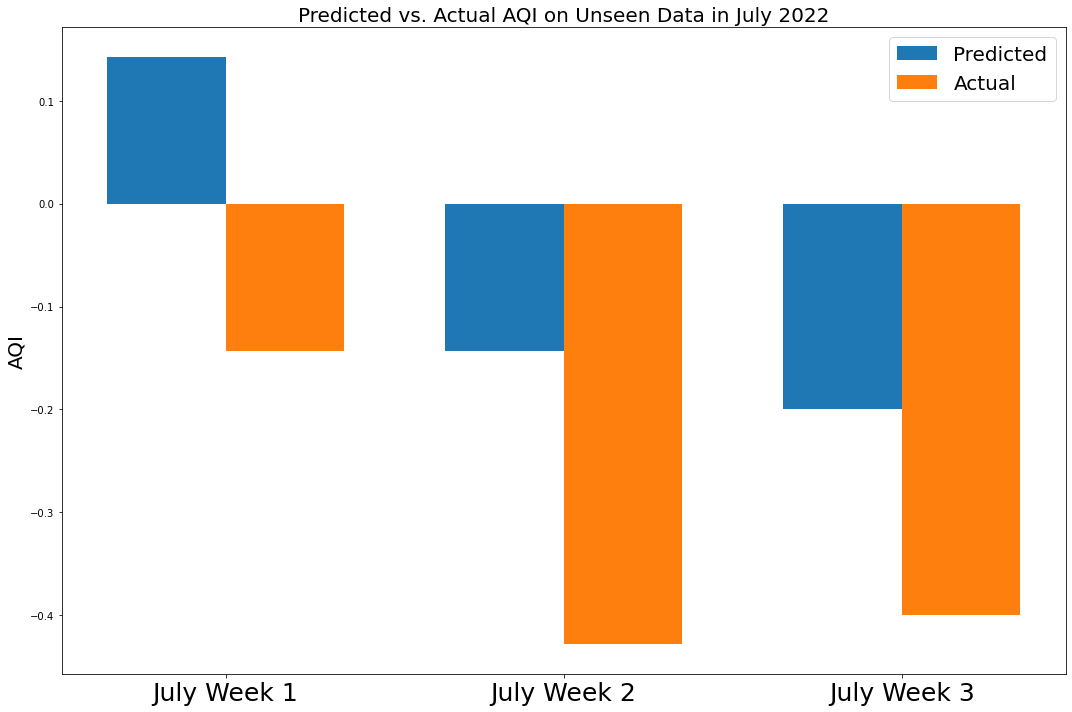

<Figure size 432x288 with 0 Axes>

In [61]:
labels = ['July Week 1', 'July Week 2', 'July Week 3']
Predicted = [jweek1, jweek2, jweek3]
Actual = [jaqweek1, jaqweek2, jaqweek3]

x = np.arange(len(labels))
width = 0.35  

fig, ax = plt.subplots(figsize=(15,10))
rects1 = ax.bar(x - width/2, Predicted, width, label='Predicted')
rects2 = ax.bar(x + width/2, Actual, width, label='Actual')

ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=25)
ax.set_ylabel('AQI',fontsize=20)
ax.set_title('Predicted vs. Actual AQI on Unseen Data in July 2022',fontsize=20)
ax.legend(prop={'size':20})

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

figplt = plt.gcf()
plt.show()
plt.draw()
figplt.savefig('pltmmj.png',bbox_inches='tight',dpi=200)

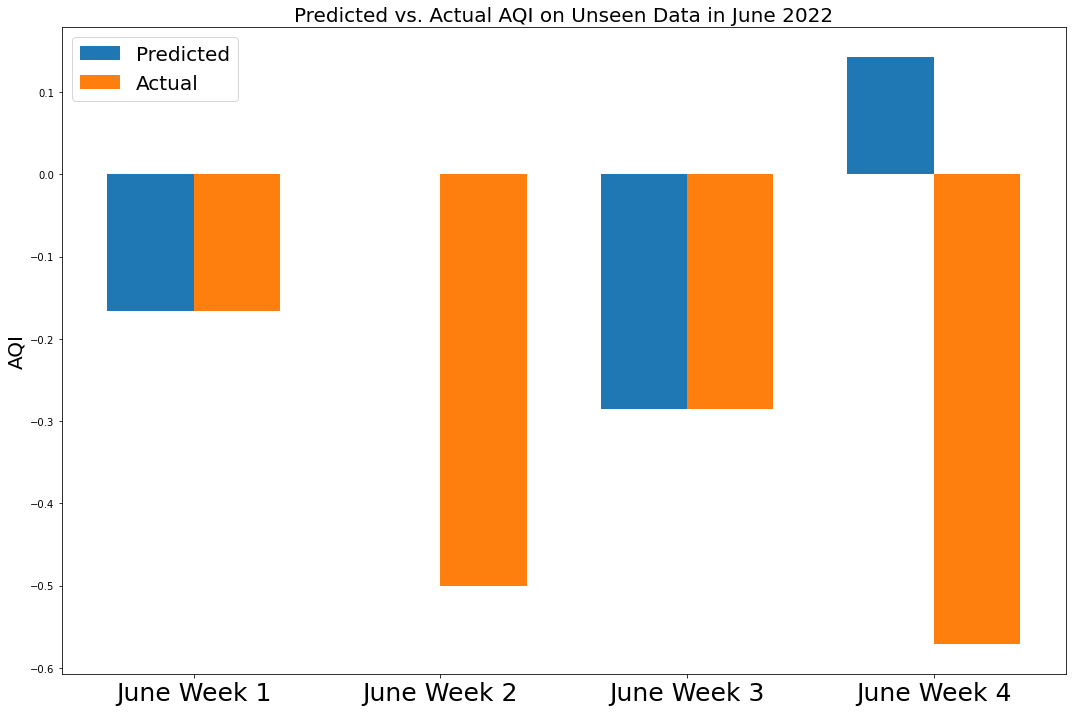

<Figure size 432x288 with 0 Axes>

In [62]:
labels = ['June Week 1', 'June Week 2', 'June Week 3', 'June Week 4']
Predicted = [week1, week2, week3, week4]
Actual = [aqweek1, aqweek2, aqweek3, aqweek4]

x = np.arange(len(labels))
width = 0.35  

fig, ax = plt.subplots(figsize=(15,10))
rects1 = ax.bar(x - width/2, Predicted, width, label='Predicted')
rects2 = ax.bar(x + width/2, Actual, width, label='Actual')

ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=25)
ax.set_ylabel('AQI',fontsize=20)
ax.set_title('Predicted vs. Actual AQI on Unseen Data in June 2022',fontsize=20)
ax.legend(prop={'size':20})

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

figplt = plt.gcf()
plt.show()
plt.draw()
figplt.savefig('pltmm.png',bbox_inches='tight',dpi=200)

In [48]:
# daypred = []
# for i in range(0, len(unseen)):
#     day = unseen.iloc[i]
#     print(day.head())
# #     print(unseen.iloc[i])
#     daypred.append(en.predict(day))
# #     en.predict()

In [49]:
from sklearn.metrics import classification_report
print(classification_report(aq, pred))

              precision    recall  f1-score   support

        -1.0       1.00      0.37      0.54        19
         0.0       0.68      0.96      0.79        28
         1.0       0.75      0.75      0.75         4

    accuracy                           0.73        51
   macro avg       0.81      0.69      0.69        51
weighted avg       0.80      0.73      0.70        51



ensemble model prediction of unseen data was 71% accurate compared to its actual aq; less than average detecting good aq (f1-score 0.42)

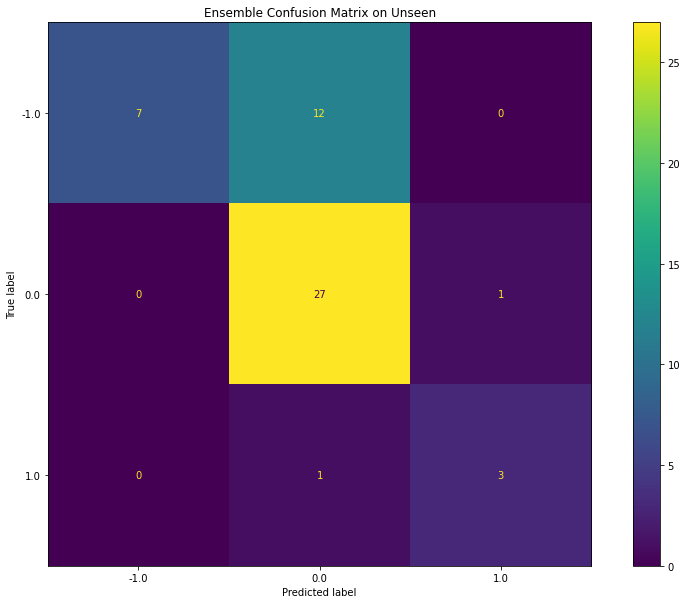

<Figure size 432x288 with 0 Axes>

In [50]:
cf_matrix = confusion_matrix(aq, pred)

fig, ax = plt.subplots(figsize=(15,10))
# ax.subtitle("Best Estimator Confusion Matrix")
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix, 
                              display_labels=svm_results.best_estimator_.named_steps['model'].classes_)
disp.plot(ax=ax)
ax.set_title("Ensemble Confusion Matrix on Unseen")
figcm1 = plt.gcf()
plt.show()
plt.draw()
figcm1.savefig('mmcm1.png',bbox_inches='tight',dpi=200)

predicted moderate (0) air quality when actual air quality was good (-1) more than average for unseen data

# Forward Projection

In [51]:
# unseen

In [52]:
# def add_date_features(unseen, date):
 
#     #the year, e.g. 2017
#     unseen['year'] = unseen[date].dt.isocalendar().year
 
#     #the month number, e.g. January = 1
#     unseen['month'] = unseen[date].dt.month
 
#     #the calendar day, e.g. 13th May = 13
#     unseen['day'] = unseen[date].dt.day

In [53]:
# mms.info()

In [54]:
# mms.describe().T

In [55]:
# from lightgbm import LGBMRegressor
# from statsmodels.tsa.seasonal import seasonal_decompose
# from statsmodels.graphics.tsaplots import plot_acf
# from scipy.stats import t
# from sklearn.model_selection import TimeSeriesSplit
# from sklearn.metrics import mean_absolute_error

# def decompose_mms(mms, share_type=' AQI Value', samples=1384, period=24):
#     if samples == 'all':
#         #decomposing all time series timestamps
#         res = seasonal_decompose(mms[share_type].values, period=period)
#     else:
#         #decomposing a sample of the time series
#         res = seasonal_decompose(mms[share_type].values[-samples:], period=period)
    
#     observed = res.observed
#     trend = res.trend
#     seasonal = res.seasonal
#     residual = res.resid
    
#     #plot the complete time series
#     fig, axs = plt.subplots(4, figsize=(16,8))
#     axs[0].set_title('OBSERVED', fontsize=16)
#     axs[0].plot(observed)
#     axs[0].grid()
    
#     #plot the trend of the time series
#     axs[1].set_title('TREND', fontsize=16)
#     axs[1].plot(trend)
#     axs[1].grid()
    
#     #plot the seasonality of the time series. Period=24 daily seasonality | Period=24*7 weekly seasonality.
#     axs[2].set_title('SEASONALITY', fontsize=16)
#     axs[2].plot(seasonal)
#     axs[2].grid()
    
#     #plot the noise of the time series
#     axs[3].set_title('NOISE', fontsize=16)
#     axs[3].plot(residual)
#     axs[3].scatter(y=residual, x=range(len(residual)), alpha=0.5)
#     axs[3].grid()
    
#     plt.show()

In [56]:
# decompose_mms(mms, samples=1384, period=24)

In [57]:
# plot_acf(mms[' AQI Value'].values, lags=48)
# plt.show()

In [58]:
# mms.index